# 4 Mel Frequency Cepstrum Coefficients step-by-step

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ssi
from scipy import fftpack
from scipy.fftpack.realtransforms import dct
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist
from scipy.cluster import hierarchy
from sklearn.mixture import GaussianMixture
from random import randint

from lab1_tools import *
from lab1_proto import *

In [2]:
# Load data (utterances of digits) and example
data = np.load('lab1_data.npz', allow_pickle=True)['data']
example = np.load('lab1_example.npz', allow_pickle=True)['example'].item()

Enframing the speech samples...


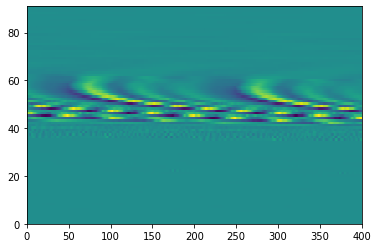

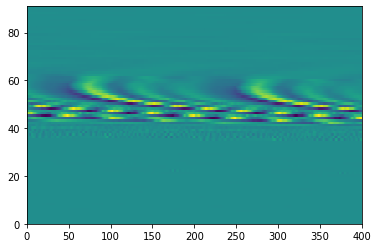

The result matches the example.


In [3]:
# 4.1: Enframe
print("Enframing the speech samples...")
# Figuring out the frame's window length (number of samples per frame)
# and window shift (number of overlapping samples in consecutive frames)
# from the signal's sampling rate.
num_samples = int(example['samplingrate']/1000) # Number of samples per 1ms
winlen = num_samples * 20 # Window length of 20ms ~ number of samples in 20ms
winshift = num_samples * 10 # Window shift in 10ms
frames = enframe(example['samples'], winlen, winshift)

if compare(frames, example['frames']): print("The result matches the example.")
else: print("The result doesn't match the example.")

Applying pre-emphasis filter...


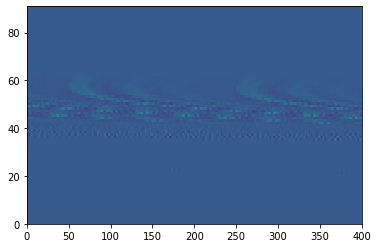

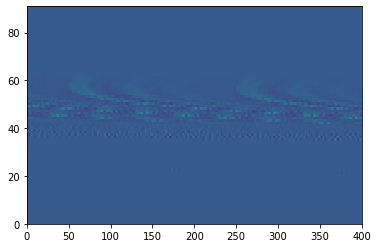

The result matches the example.


In [4]:
# 4.2: Pre-emphasis filter
print("Applying pre-emphasis filter...")

# For the definition of the filter coefficients, check the documentation at
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# and slide 67 in lecture 02 (alpha = p = 0.97)

pre_emphasis = preemp(frames, 0.97)

if compare(pre_emphasis, example['preemph']): print("The result matches the example.")
else: print("The result doesn't match the example.")

Applying hamming window...
Plotting the hamming window shape...


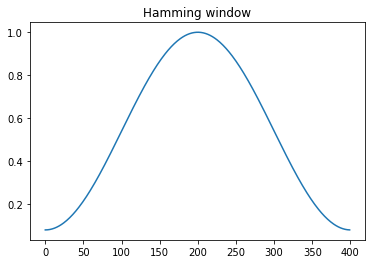

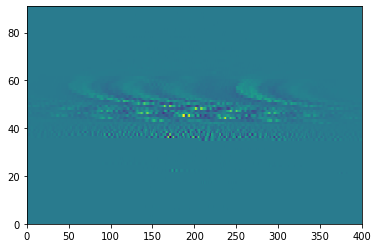

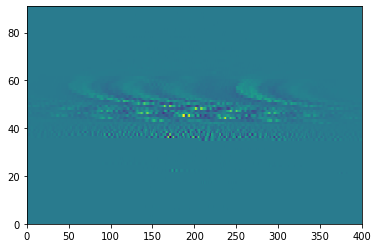

The result matches the example.


In [5]:
# 4.3: Hamming window
print("Applying hamming window...")
hamming_window = windowing(pre_emphasis)

# Why we use hamming window at: 
# https://stackoverflow.com/questions/5418951/what-is-the-hamming-window-for

if compare(hamming_window, example['windowed']): print("The result matches the example.")
else: print("The result doesn't match the example.")

Applying Fast Fourier Transfrom...
Plotting the resulting power spectogram...


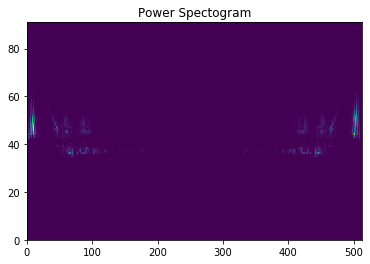

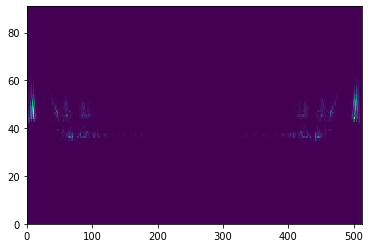

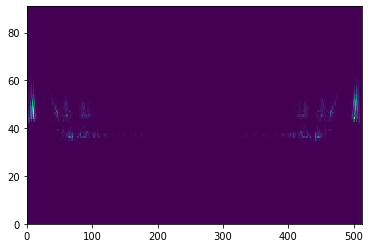

The result matches the example.


In [7]:
# 4.4: Fast Fourier Transfrom
print("Applying Fast Fourier Transfrom...")
FFT = powerSpectrum(hamming_window, 512)

print("Plotting the resulting power spectogram...")
plt.pcolormesh(FFT)
plt.title("Power Spectogram")
plt.show()

# According to the Sampling Theorem, f_max is the largest frequency
# in the signal, and 2 * f_max is the minimum sampling rate (samples
# per second) for the signal.

if compare(FFT, example['spec']): print("The result matches the example.")
else: print("The result doesn't match the example.")